Import the necessary libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('data.csv')

In [3]:
data = df.copy()

In [4]:
data.head()

,Timestamp,Which level of medical training are you?,How old are you?,Religion,Are you married?,Marital Status of parents,Do you have a good support system that you can fall back on during financial crisis?,Do you have a good support system that you can fall back on during emotional crisis?,"On an average, how many hours do you sleep daily?","Do you experience burnout, anxiety and depression especially when exams are getting closer?",...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,2021/02/23 3:39:04 AM PST,Clinical (500-600),21-24,Islam,No,Married,No,NaN,4-6 hours,Yes,...,Yes,No,No,Yes,No,No,No,NaN,No,Disagree
1,2021/02/23 10:12:09 PM PST,Basic Medical(100-300),21-24,Christianity,No,Married,No,No,6-8 hours,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/02/23 10:22:06 PM PST,Basic Medical(100-300),21-24,Christianity,No,Married,Yes,Yes,6-8 hours,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/02/23 10:34:25 PM PST,Basic Medical(100-300),16-20,Islam,No,Married,Yes,Yes,4-6 hours,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/02/23 10:39:09 PM PST,Basic Medical(100-300),16-20,Islam,No,Married,Yes,Yes,less than 4 hours,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(146, 49)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 49 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Timestamp                                                                                                   146 non-null    object 
 1   Which level of medical training are you?                                                                    146 non-null    object 
 2   How old are you?                                                                                            146 non-null    object 
 3   Religion                                                                                                    146 non-null    object 
 4   Are you married?                                                    

In [7]:
cols_to_drop = ['Timestamp','If you have anything important that can help this study. Kindly state them here.','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48']

In [8]:
data = data.drop(cols_to_drop, axis = 1)

data

,Which level of medical training are you?,How old are you?,Religion,Are you married?,Marital Status of parents,Do you have a good support system that you can fall back on during financial crisis?,Do you have a good support system that you can fall back on during emotional crisis?,"On an average, how many hours do you sleep daily?","Do you experience burnout, anxiety and depression especially when exams are getting closer?",Have you ever been hospitalized for a mental illness?,...,Have you ever repeated a class in medical school?,Do you think you will be performing better if you were in another department?,Have you ever had suicidal thoughts before?,Have you ever experienced a mental illness during your course of study?,"If yes, kindly state the level",Do you think mental illness is under diagnosed among medical students?,"Could fear, stigma and its unintended influence on academic performance be a cause of its under diagnosis?",Have you ever visited a mental health expert?,"Over the last three months, have you experienced psychological stress?",Do you have a diagnosed mental health problem?
0,Clinical (500-600),21-24,Islam,No,Married,No,NaN,4-6 hours,Yes,NaN,...,NaN,NaN,No,No,NaN,No,No,No,Yes,No
1,Basic Medical(100-300),21-24,Christianity,No,Married,No,No,6-8 hours,No,No,...,No,Yes,No,No,NaN,Yes,Yes,No,Yes,No
2,Basic Medical(100-300),21-24,Christianity,No,Married,Yes,Yes,6-8 hours,Yes,Yes,...,No,Yes,No,Yes,300.0,Yes,Yes,Yes,Yes,Yes
3,Basic Medical(100-300),16-20,Islam,No,Married,Yes,Yes,4-6 hours,Yes,No,...,No,Yes,No,No,300.0,Yes,Yes,No,Yes,I do not know
4,Basic Medical(100-300),16-20,Islam,No,Married,Yes,Yes,less than 4 hours,Yes,No,...,No,No,No,No,NaN,Yes,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Basic Medical(100-300),21-24,Islam,No,Married,No,Yes,6-8 hours,No,No,...,No,Yes,No,No,NaN,Yes,Yes,No,No,No
142,Basic Clinical(400),21-24,Christianity,No,Married,No,No,4-6 hours,Yes,No,...,No,Yes,No,Yes,300.0,Yes,Yes,No,No,No
143,Basic Clinical(400),21-24,Islam,No,Married,No,No,4-6 hours,Yes,Yes,...,No,No,Yes,Yes,NaN,Yes,Yes,No,Yes,I do not know
144,Clinical (500-600),24-30,Christianity,No,Married,Yes,No,6-8 hours,No,No,...,No,Yes,No,No,NaN,Yes,Yes,No,Yes,No


In [9]:
data = data.drop(0, axis = 0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 1 to 145
Data columns (total 36 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Which level of medical training are you?                                                                    145 non-null    object 
 1   How old are you?                                                                                            145 non-null    object 
 2   Religion                                                                                                    145 non-null    object 
 3   Are you married?                                                                                            145 non-null    object 
 4   Marital Status of parents                                           

### Determining the nature of data we are working with

In [11]:
data.dtypes.value_counts()

object     34
float64     2
dtype: int64

In [12]:
data.dtypes[data.dtypes == 'object'].index

Index(['Which level of medical training are you?', 'How old are you?',
       'Religion', 'Are you married?', 'Marital Status of parents',
       'Do you have a good support system that you can fall back on during financial crisis?',
       'Do you have a good support system that you can fall back on during emotional crisis?',
       'On an average, how many hours do you sleep daily?',
       'Do you experience burnout, anxiety and depression especially when exams are getting closer?',
       'Have you ever been hospitalized for a mental illness? ',
       'Do you have reduced ability to concentrate for over a short period?',
       'Do you have a long term physical health condition?',
       'Do you experience social isolation, withdrawal from friends and loneliness often?',
       'Do you experience hospital anxiety and depression?',
       'Have you ever experienced a childhood abuse, neglect or trauma?',
       'Is there a history of mental illness in a blood relative, such as a pa

In [13]:
data.shape

(145, 36)

### Data Visualization

In [14]:
data['Which level of medical training are you?'].value_counts()

Basic Medical(100-300)    95
Clinical (500-600)        25
Basic Clinical(400)       25
Name: Which level of medical training are you?, dtype: int64

<AxesSubplot:>

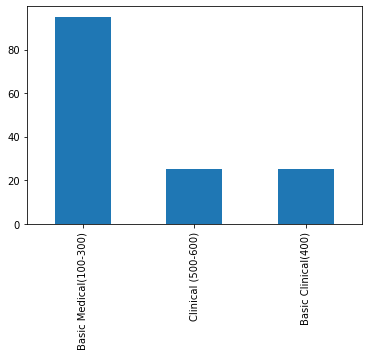

In [15]:
# This shows that most of the respondents were in their early years of the medical training
data['Which level of medical training are you?'].value_counts().plot(kind= 'bar')

In [16]:
data['Do you have a diagnosed mental health problem?'].value_counts()

No               108
I do not know     30
Yes                7
Name: Do you have a diagnosed mental health problem?, dtype: int64

In [17]:
data['How old are you?'].value_counts()

21-24    65
16-20    61
24-30    18
30+       1
Name: How old are you?, dtype: int64

<AxesSubplot:>

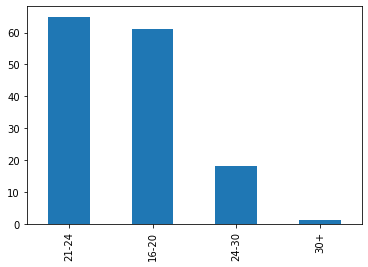

In [18]:
# This shows that most of the respondents are in their early years.
data['How old are you?'].value_counts().plot(kind= 'bar')

<AxesSubplot:>

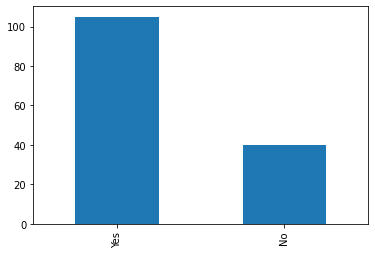

In [19]:
# Most of the respondents had a good financial support system
data['Do you have a good support system that you can fall back on during financial crisis?'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

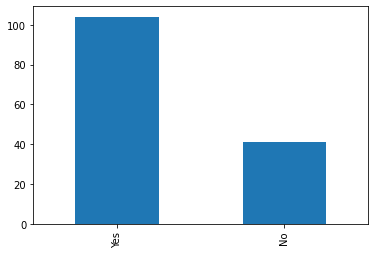

In [20]:
# Most of the respondents has a good emotional support system
data['Do you have a good support system that you can fall back on during emotional crisis?'].value_counts().plot(kind = 'bar')

In [21]:
data['Which level have you had the toughest experience of your medical training?'].value_counts()

200         58
300         36
400         34
Option 7     2
100          2
500          1
Name: Which level have you had the toughest experience of your medical training?, dtype: int64

<AxesSubplot:>

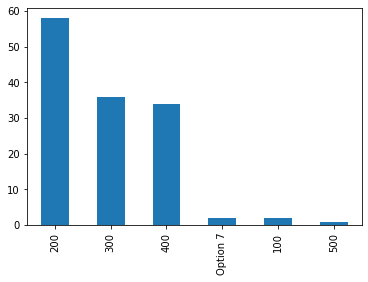

In [22]:
# This shows that majority of the respondents had their toughest experience in the 200 level
data['Which level have you had the toughest experience of your medical training?'].value_counts().plot(kind = 'bar')

### Preprocessing

In [23]:
data.head()

,Which level of medical training are you?,How old are you?,Religion,Are you married?,Marital Status of parents,Do you have a good support system that you can fall back on during financial crisis?,Do you have a good support system that you can fall back on during emotional crisis?,"On an average, how many hours do you sleep daily?","Do you experience burnout, anxiety and depression especially when exams are getting closer?",Have you ever been hospitalized for a mental illness?,...,Have you ever repeated a class in medical school?,Do you think you will be performing better if you were in another department?,Have you ever had suicidal thoughts before?,Have you ever experienced a mental illness during your course of study?,"If yes, kindly state the level",Do you think mental illness is under diagnosed among medical students?,"Could fear, stigma and its unintended influence on academic performance be a cause of its under diagnosis?",Have you ever visited a mental health expert?,"Over the last three months, have you experienced psychological stress?",Do you have a diagnosed mental health problem?
1,Basic Medical(100-300),21-24,Christianity,No,Married,No,No,6-8 hours,No,No,...,No,Yes,No,No,NaN,Yes,Yes,No,Yes,No
2,Basic Medical(100-300),21-24,Christianity,No,Married,Yes,Yes,6-8 hours,Yes,Yes,...,No,Yes,No,Yes,300.0,Yes,Yes,Yes,Yes,Yes
3,Basic Medical(100-300),16-20,Islam,No,Married,Yes,Yes,4-6 hours,Yes,No,...,No,Yes,No,No,300.0,Yes,Yes,No,Yes,I do not know
4,Basic Medical(100-300),16-20,Islam,No,Married,Yes,Yes,less than 4 hours,Yes,No,...,No,No,No,No,NaN,Yes,Yes,No,Yes,No
5,Basic Medical(100-300),16-20,Islam,No,Married,Yes,Yes,4-6 hours,Yes,No,...,No,Yes,Yes,No,NaN,Yes,Yes,No,Yes,I do not know


In [24]:
data.rename({'Which level of medical training are you?': 'level',
             'How old are you?': 'age',
             'Are you married?': 'married',
             'Marital Status of parents': 'parents',
             'Do you have a good support system that you can fall back on during financial crisis?': 'fin_crisis',
             'Do you have a good support system that you can fall back on during emotional crisis?': 'emo_crisis',
             'On an average, how many hours do you sleep daily?': 'sleep_avg',
             'Do you experience burnout, anxiety and depression especially when exams are getting closer?': 'exam_burnout',
             'Have you ever been hospitalized for a mental illness?': 'hospitalised',
             'Do you have reduced ability to concentrate for over a short period?': 'concentration_reduced',
             'Do you have a long term physical health condition?': 'health_issues_long',
             'Do you experience social isolation, withdrawal from friends and loneliness often?': 'social_issues',
             'Do you experience hospital anxiety and depression?': 'hospital_anxiety',
             'Have you ever experienced a childhood abuse, neglect or trauma?': 'childhood_trauma',
             'Is there a history of mental illness in a blood relative, such as a parent or sibling?': 'familial_history',
             'Which level have you had the toughest experience of your medical training?': 'hardest_level',
             'Do you have any extracurricular activities to cool your mind off medicine?': 'extracurricular',
             'Which extracurricular activities are you involved in? Kindly state them': 'extracurricular_name',
             'Does learning in a congested classroom pose a problem to you?': 'congestion_problem',
             'Are you satisfied with being in medicine as a discipline': 'satisfaction',
             'How do you describe your assessment in medical school?': 'assessment',
             'Has your self-esteem been impacted negatively in medical school': 'self_esteem',
             'On a grade of 1-5, where does your self-esteem fall? (1-lowest, 5-highest)': 'self_esteem_impact',
             'Have you ever had a resit exam in medical school?': 'resit',
             'Have you ever repeated a class in medical school?': 'repeated',
             'Do you think you will be performing better if you were in another department?': 'department_change',
             'Have you ever had suicidal thoughts before?': 'suicidal_thoughts',
             'Have you ever experienced a mental illness during your course of study?':'mental_illness_experience',
             'If yes, kindly state the level':'mental_illness_level',
             'Do you think mental illness is under diagnosed among medical students?':'mental_illness_diagnosis',
             'Could fear, stigma and its unintended influence on academic performance be a cause of its under diagnosis?':'underdiagnosis_reason',
             'Have you ever visited a mental health expert?': 'visit_to_expert',
             'Over the last three months, have you experienced psychological stress?':'stress',
             'Do you have a diagnosed mental health problem?': 'mentally_ill'},
            axis=1, inplace=True
        
)
data.head()

,level,age,Religion,married,parents,fin_crisis,emo_crisis,sleep_avg,exam_burnout,Have you ever been hospitalized for a mental illness?,...,repeated,department_change,suicidal_thoughts,mental_illness_experience,mental_illness_level,mental_illness_diagnosis,underdiagnosis_reason,visit_to_expert,stress,mentally_ill
1,Basic Medical(100-300),21-24,Christianity,No,Married,No,No,6-8 hours,No,No,...,No,Yes,No,No,NaN,Yes,Yes,No,Yes,No
2,Basic Medical(100-300),21-24,Christianity,No,Married,Yes,Yes,6-8 hours,Yes,Yes,...,No,Yes,No,Yes,300.0,Yes,Yes,Yes,Yes,Yes
3,Basic Medical(100-300),16-20,Islam,No,Married,Yes,Yes,4-6 hours,Yes,No,...,No,Yes,No,No,300.0,Yes,Yes,No,Yes,I do not know
4,Basic Medical(100-300),16-20,Islam,No,Married,Yes,Yes,less than 4 hours,Yes,No,...,No,No,No,No,NaN,Yes,Yes,No,Yes,No
5,Basic Medical(100-300),16-20,Islam,No,Married,Yes,Yes,4-6 hours,Yes,No,...,No,Yes,Yes,No,NaN,Yes,Yes,No,Yes,I do not know


In [25]:
data.head(2)

,level,age,Religion,married,parents,fin_crisis,emo_crisis,sleep_avg,exam_burnout,Have you ever been hospitalized for a mental illness?,...,repeated,department_change,suicidal_thoughts,mental_illness_experience,mental_illness_level,mental_illness_diagnosis,underdiagnosis_reason,visit_to_expert,stress,mentally_ill
1,Basic Medical(100-300),21-24,Christianity,No,Married,No,No,6-8 hours,No,No,...,No,Yes,No,No,NaN,Yes,Yes,No,Yes,No
2,Basic Medical(100-300),21-24,Christianity,No,Married,Yes,Yes,6-8 hours,Yes,Yes,...,No,Yes,No,Yes,300.0,Yes,Yes,Yes,Yes,Yes


## Bivariate Analysis

<Figure size 720x504 with 0 Axes>

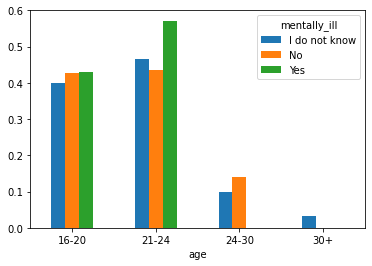

<Figure size 720x504 with 0 Axes>

In [26]:
# Age and mentally ill

gender = pd.crosstab(data['age'], data['mentally_ill'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

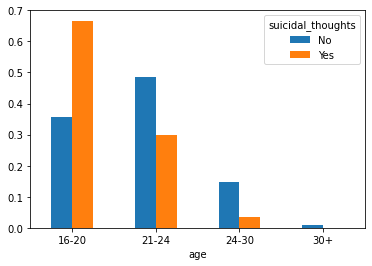

<Figure size 720x504 with 0 Axes>

In [27]:
# age and suicidal thoughts

gender = pd.crosstab(data['age'], data['suicidal_thoughts'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

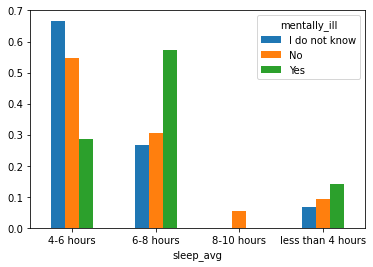

<Figure size 720x504 with 0 Axes>

In [28]:
gender = pd.crosstab(data['sleep_avg'], data['mentally_ill'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

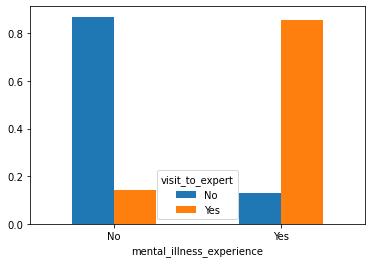

<Figure size 720x504 with 0 Axes>

In [29]:
gender = pd.crosstab(data['mental_illness_experience'], data['visit_to_expert'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

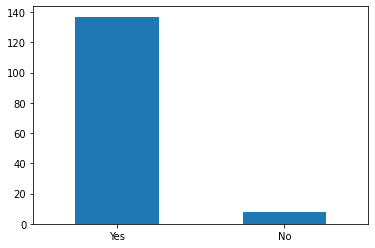

<Figure size 720x504 with 0 Axes>

In [30]:
data['underdiagnosis_reason'].value_counts().plot(kind = 'bar')

plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

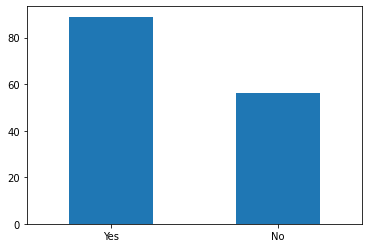

<Figure size 720x504 with 0 Axes>

In [31]:
data['extracurricular'].value_counts().plot(kind = 'bar')

plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

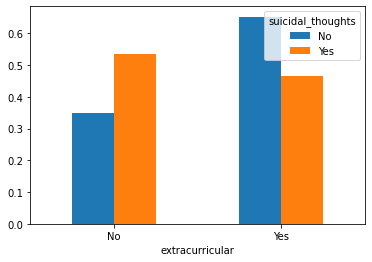

<Figure size 720x504 with 0 Axes>

In [32]:
gender = pd.crosstab(data['extracurricular'], data['suicidal_thoughts'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

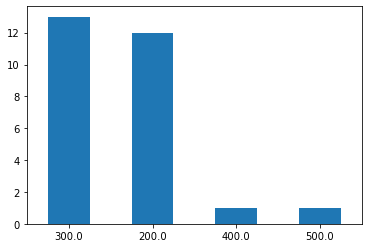

<Figure size 720x504 with 0 Axes>

In [33]:
data['mental_illness_level'].value_counts().plot(kind = 'bar')

plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

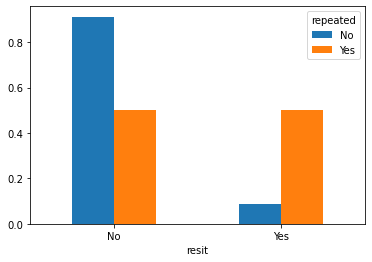

<Figure size 720x504 with 0 Axes>

In [34]:
gender = pd.crosstab(data['resit'], data['repeated'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

<Figure size 720x504 with 0 Axes>

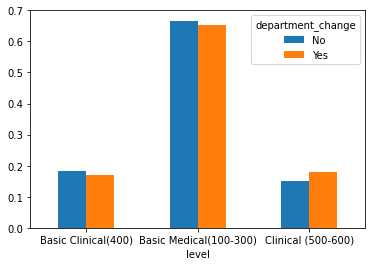

<Figure size 720x504 with 0 Axes>

In [35]:
gender = pd.crosstab(data['level'], data['department_change'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 1 to 145
Data columns (total 36 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   level                                                           145 non-null    object 
 1   age                                                             145 non-null    object 
 2   Religion                                                        145 non-null    object 
 3   married                                                         145 non-null    object 
 4   parents                                                         141 non-null    object 
 5   fin_crisis                                                      145 non-null    object 
 6   emo_crisis                                                      145 non-null    object 
 7   sleep_avg                                            

In [37]:
data['mentally_ill'].value_counts()

No               108
I do not know     30
Yes                7
Name: mentally_ill, dtype: int64

In [38]:
data['mentally_ill'] = data['mentally_ill'].replace({'I do not know': 1,'No': 0, 'Yes': 1 })

In [39]:
data['mentally_ill'].value_counts()

0    108
1     37
Name: mentally_ill, dtype: int64

## DATA PROCESSING

In [40]:
data.drop(['mental_illness_level','extracurricular_name'], axis=1, inplace= True)

In [41]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Religion','married','parents','fin_crisis','emo_crisis','exam_burnout','Have you ever been hospitalized for a mental illness?','concentration_reduced',
                  'health_issues_long','social_issues','hospital_anxiety','childhood_trauma','familial_history','extracurricular',
                   'congestion_problem','satisfaction','self_esteem','resit','repeated','department_change','suicidal_thoughts','mental_illness_experience',
                   'mental_illness_diagnosis','under_diagnosis','visit_to_expert']

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Preprocess the numerical data

In [43]:
numerical_transformer = SimpleImputer(strategy='median')

## Preprocess the categorical data

In [44]:
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('imput', LabelEncoder())
])

## Bundle preprocessing for numerical and categorical data

In [45]:
preprocessor = ColumnTransformer(
transformers=[
# ('num', numerical_transformer, numerical_cols),
('cat', categorical_transformer, categorical_cols)
])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 1 to 145
Data columns (total 34 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   level                                                           145 non-null    object 
 1   age                                                             145 non-null    object 
 2   Religion                                                        145 non-null    object 
 3   married                                                         145 non-null    object 
 4   parents                                                         141 non-null    object 
 5   fin_crisis                                                      145 non-null    object 
 6   emo_crisis                                                      145 non-null    object 
 7   sleep_avg                                            

In [47]:
for i in data:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [48]:
data.head()

,level,age,Religion,married,parents,fin_crisis,emo_crisis,sleep_avg,exam_burnout,Have you ever been hospitalized for a mental illness?,...,resit,repeated,department_change,suicidal_thoughts,mental_illness_experience,mental_illness_diagnosis,underdiagnosis_reason,visit_to_expert,stress,mentally_ill
1,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
2,1,1,0,0,0,1,1,1,1,1,...,0,0,1,0,1,1,1,1,1,1
3,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,1,0,1,1
4,1,0,1,0,0,1,1,3,1,0,...,0,0,0,0,0,1,1,0,1,0
5,1,0,1,0,0,1,1,0,1,0,...,0,0,1,1,0,1,1,0,1,1


<AxesSubplot:xlabel='level', ylabel='suicidal_thoughts'>

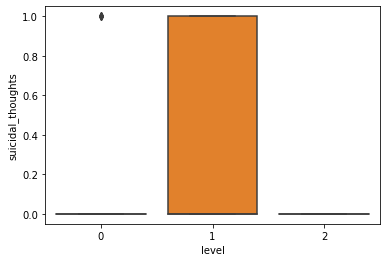

In [49]:
sns.boxplot(x='level', y='suicidal_thoughts', data= data)

# MODEL BUILDING

In [50]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [51]:
# split data into features amd target

X = data.drop(['mentally_ill'], axis= 1)
y = data['mentally_ill']

In [52]:
# This shows that the target variable is an imbalanced class and therefore we need to solve this problem
y.value_counts()

0    108
1     37
Name: mentally_ill, dtype: int64

In [53]:
X.head(2)

,level,age,Religion,married,parents,fin_crisis,emo_crisis,sleep_avg,exam_burnout,Have you ever been hospitalized for a mental illness?,...,How did your grades in medical school affect your self-esteem?,resit,repeated,department_change,suicidal_thoughts,mental_illness_experience,mental_illness_diagnosis,underdiagnosis_reason,visit_to_expert,stress
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1
2,1,1,0,0,0,1,1,1,1,1,...,2,0,0,1,0,1,1,1,1,1


In [54]:
y.head(2)

1    0
2    1
Name: mentally_ill, dtype: int64

In [55]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=1234)

## RESAMPLING

In [56]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [57]:
X.head()

,level,age,Religion,married,parents,fin_crisis,emo_crisis,sleep_avg,exam_burnout,Have you ever been hospitalized for a mental illness?,...,resit,repeated,department_change,suicidal_thoughts,mental_illness_experience,mental_illness_diagnosis,underdiagnosis_reason,visit_to_expert,stress,mentally_ill
9,1,1,1,0,0,1,1,2,1,0,...,0,0,1,0,0,0,1,0,1,0
65,1,1,1,0,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
25,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,1,1
23,1,1,1,0,0,1,1,0,1,0,...,0,1,1,1,1,1,1,1,1,1
74,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


In [58]:
len(X)

116

In [59]:
# separate minority and majority classes
no_illness = X[X.mentally_ill==0]
illness = X[X.mentally_ill==1]

In [60]:
print(len(illness))
print(len(no_illness))

30
86


## Upsampling

In [61]:
# upsample minority
illness_upsampled = resample(illness,
                          replace=True, # sample with replacement
                          n_samples=len(no_illness), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_illness, illness_upsampled])

# check new class counts
upsampled.mentally_ill.value_counts()

0    86
1    86
Name: mentally_ill, dtype: int64

In [62]:
y.value_counts()

0    108
1     37
Name: mentally_ill, dtype: int64

In [63]:
y_train = upsampled.mentally_ill
X_train = upsampled.drop('mentally_ill', axis=1)


## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [65]:
logisticmodel_prediction = logisticmodel.predict(X_test)

In [66]:
# Model Evaluation

def ConfusionMatrix(ytest, ypred, label = ['Negative', 'Positive']):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot = True, cbar= False, fmt= 'd', cmap = 'YlGnBu')
    plt.xlabel('Predicted', fontsize= 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix')
    

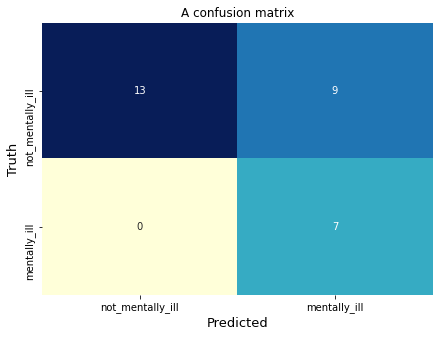

In [67]:
ConfusionMatrix(y_test, logisticmodel_prediction, label=['not_mentally_ill', 'mentally_ill'])

### Interpretation of Logistics Regression model evaluation performance


There are 19 True Negatives (TN): predicting that the patient will not have a mental health problem and truly the patient did not have

There are 2 False Negatives (FN): predicting that the patient will not have a mental health problem BUT the patient actually had

In [68]:
# Accuracy of the model

In [69]:
metrics.accuracy_score(y_test, logisticmodel_prediction)

0.6896551724137931

In [70]:
metrics.f1_score(y_test, logisticmodel_prediction)

0.6086956521739131

## NAIVE BAYES MODEL

In [71]:
from sklearn.naive_bayes import GaussianNB

naivemodel = GaussianNB()

naivemodel.fit(X_train, y_train)

GaussianNB()

In [72]:
naivemodel_prediction = naivemodel.predict(X_test)

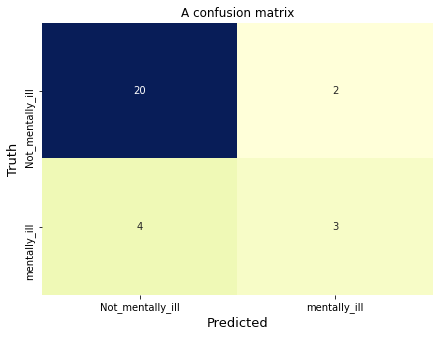

In [73]:
ConfusionMatrix(y_test, naivemodel_prediction, label= ['Not_mentally_ill', 'mentally_ill'])

In [74]:
metrics.accuracy_score(y_test, naivemodel_prediction)

0.7931034482758621

In [75]:
metrics.f1_score(y_test, naivemodel_prediction)

0.5

### RANDOM FOREST MODEL

In [76]:
from sklearn.ensemble import RandomForestClassifier

randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)

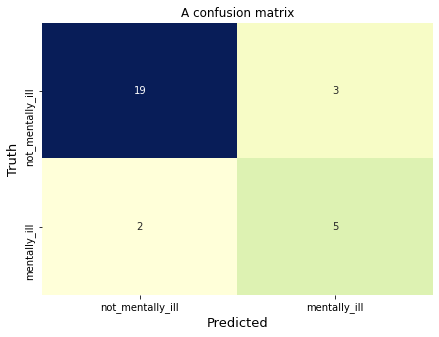

In [78]:
ConfusionMatrix(y_test, randomforestmodel_prediction, label= ['not_mentally_ill', 'mentally_ill'])

In [79]:
metrics.accuracy_score(y_test, randomforestmodel_prediction)

0.8275862068965517

In [80]:
metrics.f1_score(y_test, randomforestmodel_prediction)

0.6666666666666666

### Extreme Gradient Boost (XGBoost) Model

In [81]:
from xgboost import XGBClassifier

xgboostmodel = XGBClassifier()
xgboostmodel_ = xgboostmodel.fit(X_train, y_train)

C:\Users\Public\New folder\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:37:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [82]:
xgboostmodel_prediction = xgboostmodel_.predict(X_test)

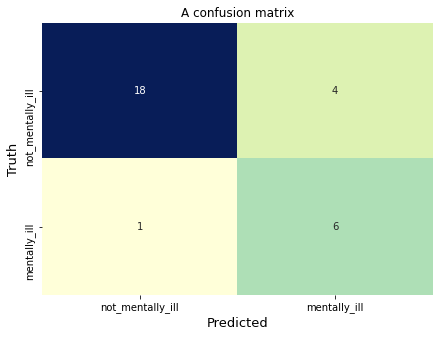

In [83]:
ConfusionMatrix(y_test, xgboostmodel_prediction, label=['not_mentally_ill', 'mentally_ill'])

In [84]:
metrics.accuracy_score(y_test, xgboostmodel_prediction)

0.8275862068965517

In [85]:
metrics.f1_score(y_test, xgboostmodel_prediction)

0.7058823529411764

## SUPPORT VECTOR MACHINE

In [86]:
from sklearn.svm import SVC

SVMmodel = SVC()
SVMmodel.fit(X_train, y_train)

SVC()

In [87]:
SVMmodel_prediction = SVMmodel.predict(X_test)

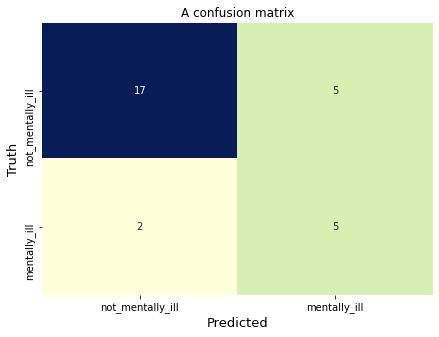

In [88]:
ConfusionMatrix(y_test, SVMmodel_prediction, label= ['not_mentally_ill','mentally_ill'])

In [89]:
metrics.accuracy_score(y_test, SVMmodel_prediction)

0.7586206896551724

In [90]:
metrics.f1_score(y_test, SVMmodel_prediction)

0.588235294117647